## The data grabbed from UHF antenna

The Parallella (Pcko) grabbing unit was used to capture triggered data from loop antennas.

In [62]:
import os
from readrecb import *
import matplotlib
from scipy.signal import find_peaks


sps = 10e6 # 10 Msps
path = "/storage/experiments/2022/0729_bourka_lhenice_CAR1/parallella/"
#path = "/storage/experiments/2022/0714_bourka_CAR0/parallella/"


files = os.listdir(path)
#files = ["rec_220729-192648.04"]

for fn in os.listdir(path)[:1]:
    with open(os.path.join(path, fn), 'rb') as f:
        try:
            h, samples, synclog = loadrec(f, skipsamples=True)
        except Exception as e:
            print(fn, e)
            continue


In [65]:
def selective_plotrec(h, samples, synclog, fn, pre_trigger_blocks=10, post_trigger_blocks=5, title=None, marktimes=[], channels = []):
    t2s, s2t, ticker, formatter = assign_time_axis(fn, h, synclog)
    
    if pre_trigger_blocks > h['preTrigger']:
        pre_trigger_blocks = h['preTrigger']
    if post_trigger_blocks > h['postTrigger']:
        post_trigger_blocks = h['postTrigger']
    
    a = (h['preTrigger']-pre_trigger_blocks)*h['descSpan']//16 #select block of samples before trigger
    b = (h['preTrigger']+post_trigger_blocks)*h['descSpan']//16  #select blocks after trigger 
        
    fig, (ax7) = plt.subplots(figsize=(28, 20), nrows=3, sharex=True)
    if title is not None:
        fig.suptitle(title)
    
    for i, ch in enumerate(channels):
        signal_samples = samples[a:b,ch]
        window_size = 80000

        ax7[i].xaxis.set_major_locator(ticker)
        ax7[i].xaxis.set_major_formatter(formatter)
        ax7[i].plot(range(a, b), signal_samples, linestyle="", marker="o", alpha=0.5, markersize=1)

        start_noise_std = np.std(signal_samples[:window_size])
        start_noise_mean = np.mean(signal_samples[:window_size])
        stop_noise_std = np.std(signal_samples[-window_size:])
        stop_noise_mean = np.mean(signal_samples[-window_size:])
        
        
        ax7[i].set_title("Channel {}".format(ch))
        ax7[i].set_xlabel('')
        #ax7[i].set_ylim(-8000, 8000)
        ax7[i].grid()
        

        threshold = 4
        for sample_num in range(0,len(signal_samples)):
            z_score = abs(signal_samples[sample_num] - start_noise_mean) / start_noise_std
            if z_score > threshold:
                event_start = sample_num
                break

        for sample_num in reversed(range(0,len(signal_samples))):
            z_score = abs(signal_samples[sample_num] - stop_noise_mean) / stop_noise_std
            if z_score > threshold:
                event_stop = sample_num
                break


        event_duration = (event_stop-event_start)/10e6
        ax7[i].text(a+event_stop/2, 6000,"Event Duration: {0:.3g} s".format(event_duration), fontsize=15)
        ax7[i].axvspan(event_start+a,event_stop+a, facecolor='green', alpha=0.5)


            
    
    at, bt = s2t(a), s2t(b)
    for t in marktimes:
        if t > at and t < bt:
            for ax in [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]:
                ax.axvline(x=t2s(t), color='purple', ls='--')
    return fig

## Plotting of the data

rec_220729-192648.04
File: rec_220729-192648.04


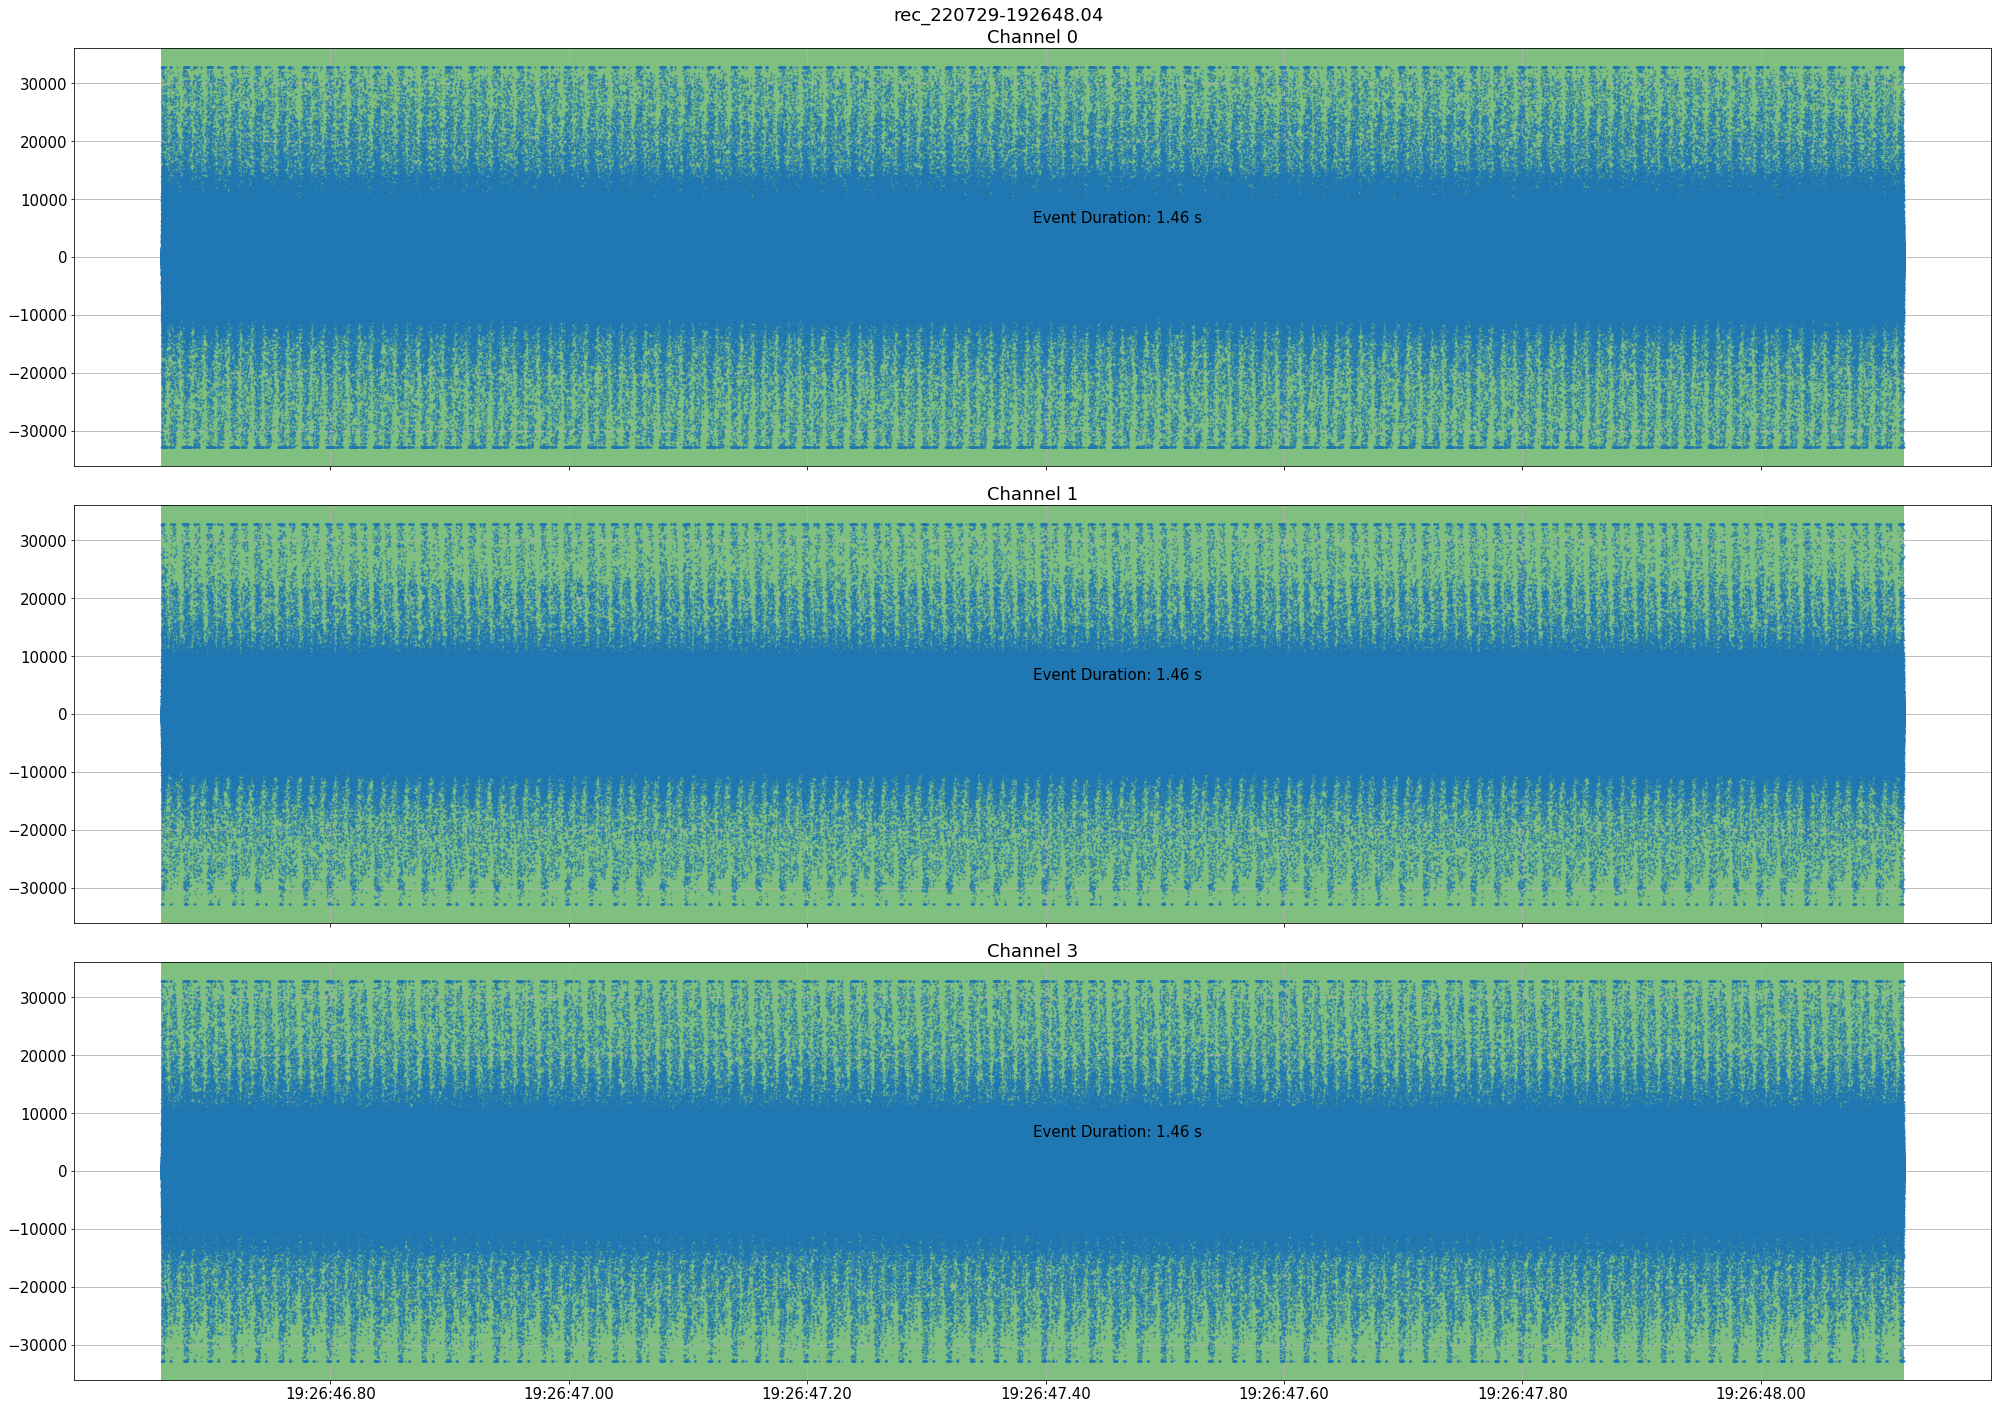

In [70]:
import os
pre_trigger_blocks = 380
post_trigger_blocks = 380


matplotlib.rcParams.update({'font.size':15})

for fn in files:
    print(fn)
    if ".csv" in files:
        continue
    with open(os.path.join(path, fn), 'rb') as f:
        try:
            print("File:", fn)
            h, samples, synclog = loadrec(f)
            fig = selective_plotrec(h, samples, synclog, os.path.basename(fn),
                    title=os.path.basename(fn),
                    pre_trigger_blocks = pre_trigger_blocks,
                    post_trigger_blocks = post_trigger_blocks,
                    #marktimes=marktimes,
                    channels = [0,1,3]
                    )
            
            plt.tight_layout()
            #plt.savefig(os.path.join(path, fn)+'.png')
            plt.savefig('/home/roman/UHF.png')
            plt.show()
   
        except Exception as e:
            print(e)

Plot all lightning records (High memory and time consuming)

<Figure size 432x288 with 0 Axes>